In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.utils import to_categorical

%matplotlib inline  


Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [3]:
print('train_images.shape:', train_images.shape)
print('train_labels.shape:', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)


train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [4]:
pixels = train_images[4]
print('pixels.shape:', pixels.shape)
print('pixels:', pixels)


pixels.shape: (28, 28)
pixels: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0

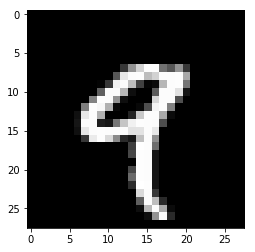

In [5]:
plt.imshow(pixels, cmap='gray')
plt.show()


In [6]:
train_images = train_images.reshape((60000, 784)) # 28 * 28 = 784
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 784)) # 28 * 28 = 784
test_images = test_images.astype('float32') / 255


In [7]:
print('train_images.shape:', train_images.shape)
print('train_labels.shape:', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)


train_images.shape: (60000, 784)
train_labels.shape: (60000,)
test_images.shape: (10000, 784)
test_labels.shape: (10000,)


In [8]:
print('train label example:',train_labels[4])


train label example: 9


In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [10]:
print('train label example:',train_labels[0])


train label example: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )


In [13]:
EPOCHS = 10

history = model.fit(train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=EPOCHS, 
            batch_size=128
           )


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2666 - acc: 0.9253 - val_loss: 0.1300 - val_acc: 0.9612
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1084 - acc: 0.9690 - val_loss: 0.0935 - val_acc: 0.9711
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0706 - acc: 0.9793 - val_loss: 0.0824 - val_acc: 0.9745
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0511 - acc: 0.9849 - val_loss: 0.0723 - val_acc: 0.9768
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0375 - acc: 0.9890 - val_loss: 0.0627 - val_acc: 0.9812
Epoch 6/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0283 - acc: 0.9918 - val_loss: 0.0692 - val_acc: 0.9787
Epoch 7/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0209 - acc: 0.9944 - val_loss: 0.0590 - val_acc

In [14]:
# list of values for (train) accuracy
acc_values = history.history['acc']

# list of values for validationaccuracy
val_acc_values = history.history['val_acc']


In [15]:
best_val_acc_value = max(val_acc_values)
print('best_val_acc_value:', best_val_acc_value)


best_val_acc_value: 0.9829


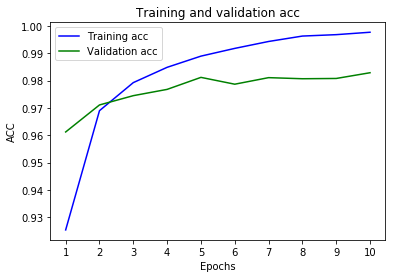

In [16]:
epochs = range(1, EPOCHS + 1) 

plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.xticks(np.arange(min(epochs), max(epochs)+1, 1.0))
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()
